In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import seaborn as sns
sns.set_style(style='white')

# Fixation probability

In [6]:
from direct_method import fixation_probability_direct_method

In [7]:
from matrix_method import fixation_probability_matrix_based

In [8]:
n_line = np.linspace(10, 2000, 30, endpoint=True, dtype=int)

In [9]:
%%capture
direct_method_results = []
for n in n_line:
    result = %timeit -o fixation_probability_direct_method(pop_size=n, beta=1.0, a=2, b=5, c=1, d=3)
    direct_method_results.append(result.best)

In [10]:
%%capture
matrix_method_results = []
for n in n_line:
    result = %timeit -o fixation_probability_matrix_based(pop_size=n, beta=1.0, a=2, b=5, c=1, d=3)
    matrix_method_results.append(result.best)

(-15, 2025)

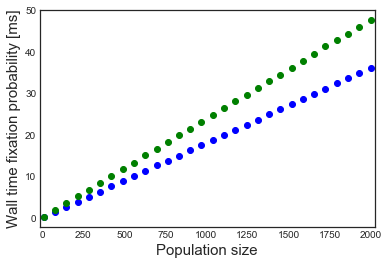

In [37]:
fig, ax = plt.subplots()
ax.plot(n_line, np.multiply(1000,direct_method_results), 'bo', label='Direct calculation')
ax.plot(n_line, np.multiply(1000,matrix_method_results), 'go', label='Matrix-based approach')
#plt.legend(loc='best', fontsize=15)
plt.xlabel("Population size", fontsize=15)
plt.tick_params(axis='15both', which='major', labelsize=30)
plt.ylabel("Wall time fixation probability [ms]", fontsize=15)
plt.xlim([n_line[0]-25, n_line[-1]+25])

In [38]:
fig.savefig('../../../manuscript/Figures/wall_time_fixation_probability.pdf')

# Fixation time

In [11]:
from direct_method import direct_conditional_fixation_time
from direct_method import direct_unconditional_fixation_time

In [12]:
from matrix_method import transition_matrix_conditional_fixation_time
from matrix_method import transition_matrix_unconditional_fixation_time

In [13]:
n_line = np.linspace(10, 2000, 30, endpoint=True, dtype=int)

In [14]:
%%capture
direct_method_results = []
for n in n_line:  
    result = %timeit -o direct_unconditional_fixation_time(pop_size=n, beta=1.0, a=2.0, b=5.0, c=1.0, d=3.0)
    direct_method_results.append(result.best)

In [15]:
%%capture
direct_method_results_cond = []
for n in n_line: 
    result = %timeit -o direct_conditional_fixation_time(pop_size=n, beta=1.0, a=2.0, b=5.0, c=1.0, d=3.0)
    direct_method_results_cond.append(result.best)

In [16]:
%%capture
matrix_method_results = []
for n in n_line: 
    result = %timeit -o transition_matrix_unconditional_fixation_time(pop_size=n, beta=1.0, a=2.0, b=5.0, c=1.0, d=3.0)
    matrix_method_results.append(result.best)

In [17]:
%%capture
matrix_method_results_cond = []
for n in n_line: 
    result = %timeit -o transition_matrix_conditional_fixation_time(pop_size=n, beta=1.0, a=2.0, b=5.0, c=1.0, d=3.0)
    matrix_method_results_cond.append(result.best)

Text(0,0.5,'Wall time average fixation time [ms]')

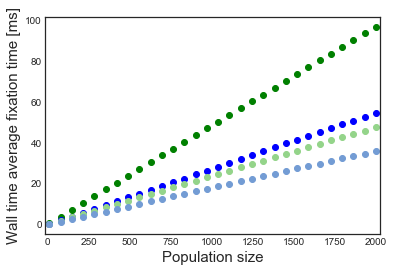

In [35]:
fig, ax = plt.subplots()
ax.plot(n_line, np.multiply(1000,matrix_method_results_cond), 'go', label='Conditional: Matrix-based')
ax.plot(n_line, np.multiply(1000,direct_method_results_cond), 'bo', label='Conditional: direct')
ax.plot(n_line, np.multiply(1000,matrix_method_results), color='#94d48a', linestyle='', marker='o', label='Unconditional: Matrix-based')
ax.plot(n_line, np.multiply(1000,direct_method_results), color='#739cd4', linestyle='', marker='o', label='Unconditional: direct')
#plt.legend(loc='upper left', fontsize=15)
plt.xlabel("Population size", fontsize=15)
plt.tick_params(axis='15both', which='major', labelsize=30)
plt.xlim([n_line[0]-25, n_line[-1]+25])
plt.ylabel("Wall time average fixation time [ms]", fontsize=15)
#plt.ylim((0.0, 0.05))

In [36]:
fig.savefig('../../../manuscript/Figures/wall_time_fixation_time.pdf')

# Stationary distribution

In [18]:
from direct_method import direct_stationary

In [19]:
from matrix_method import matrix_stationary_remove_equation

In [31]:
n_line = np.linspace(10, 2000, 30, endpoint=True, dtype=int)

In [20]:
%%capture
direct_stationary_results = []
for n in n_line:  
    result = %timeit -o direct_stationary(pop_size=n, beta=1.0, a=2.0, b=5.0, c=1.0, d=3.0, mu=0.1)
    direct_stationary_results.append(result.best)

In [21]:
%%capture
matrix_stationary_remove_results = []
for n in n_line:  
    result = %timeit -o matrix_stationary_remove_equation(pop_size=n, beta=1.0, a=2.0, b=5.0, c=1.0, d=3.0, mu=0.1)
    matrix_stationary_remove_results.append(result.best)

Text(0,0.5,'Wall time stationary distribution [ms]')

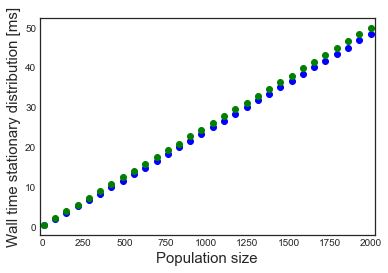

In [33]:
fig, ax = plt.subplots()
ax.plot(n_line, np.multiply(1000,direct_stationary_results), 'bo', label='Direct')
ax.plot(n_line, np.multiply(1000,matrix_stationary_remove_results), 'go', label='Matrix-based')
#plt.legend(loc='upper left', fontsize=15)
plt.xlabel("Population size", fontsize=15)
plt.tick_params(axis='15both', which='major', labelsize=30)
plt.xlim([n_line[0]-25, n_line[-1]+25])
plt.ylabel("Wall time stationary distribution [ms]", fontsize=15)

In [34]:
fig.savefig('../../../manuscript/Figures/wall_time_stationary.pdf')